In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
df=pd.read_csv('./Datasets/Raymond.csv', parse_dates=['Date'], index_col='Date')

In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,177.333328,180.000000,177.333328,180.000000,130.499954,225
1996-01-02,180.000000,180.333328,179.000000,179.966660,130.475800,1875
1996-01-03,180.000000,180.000000,180.000000,180.000000,130.499954,525
1996-01-04,180.000000,180.000000,180.000000,180.000000,130.499954,75
1996-01-05,177.000000,177.000000,174.333328,174.333328,126.391632,525
...,...,...,...,...,...,...
2024-06-14,2521.000000,2538.949951,2472.300049,2487.500000,2487.500000,128944
2024-06-18,2490.000000,2518.000000,2470.000000,2488.300049,2488.300049,116953
2024-06-19,2500.000000,2507.449951,2430.000000,2438.899902,2438.899902,81803


<Axes: xlabel='Date'>

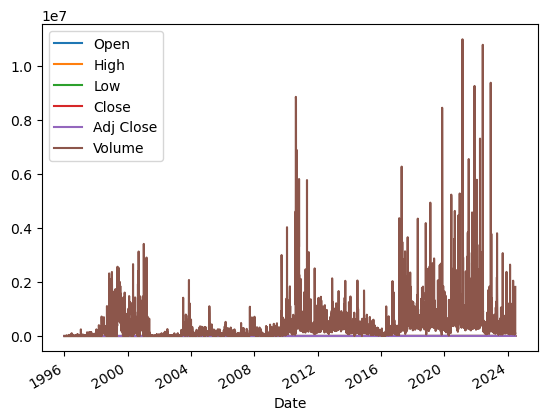

In [4]:
df.plot()

<Axes: xlabel='Date'>

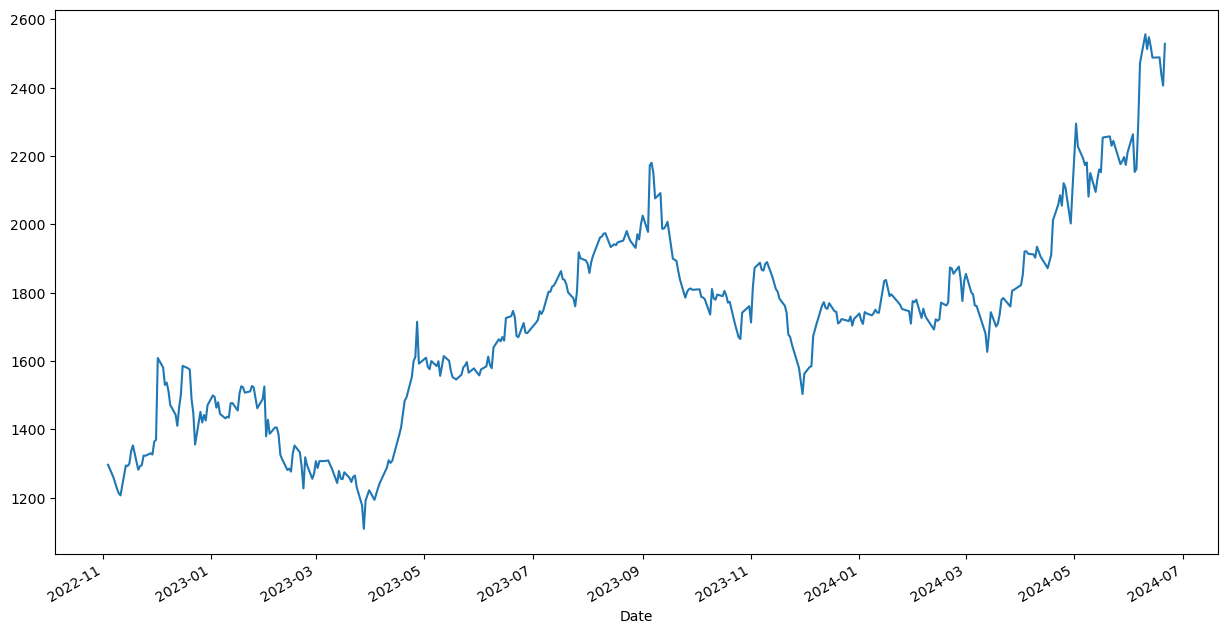

In [5]:
df[-400:].Close.plot(figsize=(15,8))

In [6]:
df['20_SMA'] = df.Close.rolling(window=20, min_periods=1).mean()
df['50_SMA'] = df.Close.rolling(window=50, min_periods=1).mean()

In [7]:
df['20_SMA']


Date
1996-01-01     180.000000
1996-01-02     179.983330
1996-01-03     179.988887
1996-01-04     179.991665
1996-01-05     178.859998
                 ...     
2024-06-14    2306.132495
2024-06-18    2317.854993
2024-06-19    2326.937488
2024-06-20    2335.742493
2024-06-21    2349.937488
Name: 20_SMA, Length: 7150, dtype: float64

In [8]:
df['50_SMA']

Date
1996-01-01     180.000000
1996-01-02     179.983330
1996-01-03     179.988887
1996-01-04     179.991665
1996-01-05     178.859998
                 ...     
2024-06-14    2148.594988
2024-06-18    2161.307988
2024-06-19    2171.675986
2024-06-20    2181.369988
2024-06-21    2193.655986
Name: 50_SMA, Length: 7150, dtype: float64

In [9]:
df['Signal'] = 0
df['Signal'] = np.where(df['20_SMA'] > df['50_SMA'], 1, 0)

In [10]:
df['Position'] = df.Signal.diff()


In [11]:
df['Position']


Date
1996-01-01    NaN
1996-01-02    0.0
1996-01-03    0.0
1996-01-04    0.0
1996-01-05    0.0
             ... 
2024-06-14    0.0
2024-06-18    0.0
2024-06-19    0.0
2024-06-20    0.0
2024-06-21    0.0
Name: Position, Length: 7150, dtype: float64

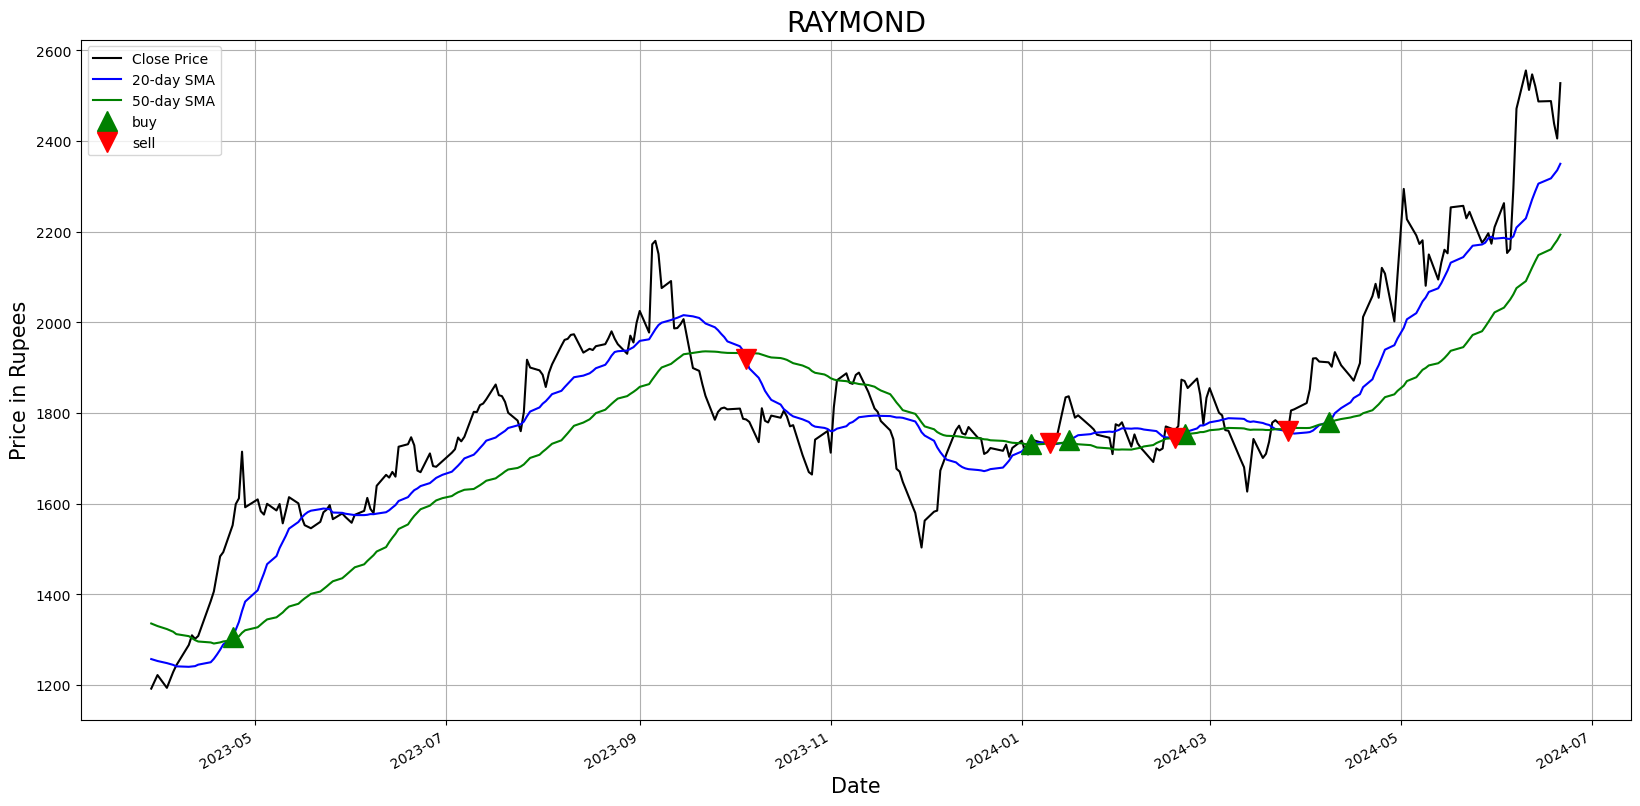

In [12]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df.iloc[-300:]['Close'].plot(color = 'k', label= 'Close Price') 
df.iloc[-300:]['20_SMA'].plot(color = 'b',label = '20-day SMA') 
df.iloc[-300:]['50_SMA'].plot(color = 'g', label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(df.iloc[-300:][df.iloc[-300:]['Position'] == 1].index, 
         df.iloc[-300:]['20_SMA'][df.iloc[-300:]['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(df.iloc[-300:][df.iloc[-300:]['Position'] == -1].index, 
         df.iloc[-300:]['20_SMA'][df.iloc[-300:]['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('RAYMOND', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [13]:
df_pos = df.iloc[-200:][(df.iloc[-200:]['Position'] == 1) | (df['Position'] == -1)].copy()
df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_pos[['Close', 'Position']], headers = 'keys', tablefmt = 'psql'))

+---------------------+---------+------------+
| Date                |   Close | Position   |
|---------------------+---------+------------|
| 2023-10-05 00:00:00 | 1785.9  | Sell       |
| 2024-01-04 00:00:00 | 1743.3  | Buy        |
| 2024-01-10 00:00:00 | 1750.05 | Sell       |
| 2024-01-16 00:00:00 | 1837.1  | Buy        |
| 2024-02-19 00:00:00 | 1762.55 | Sell       |
| 2024-02-22 00:00:00 | 1870.85 | Buy        |
| 2024-03-26 00:00:00 | 1759.5  | Sell       |
| 2024-04-08 00:00:00 | 1912    | Buy        |
+---------------------+---------+------------+


C:\Users\Avinash Warale\AppData\Local\Temp\ipykernel_11764\1228701649.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pos = df.iloc[-200:][(df.iloc[-200:]['Position'] == 1) | (df['Position'] == -1)].copy()


In [20]:
def GoldenCrossverSignal(name, data_point):
    path = f'./Datasets/{name}.csv'
    data = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
    data['20_SMA'] = data.Close.rolling(window=20, min_periods=1).mean()
    data['50_SMA'] = data.Close.rolling(window=50, min_periods=1).mean()
    data['Signal'] = 0
    data['Signal'] = np.where(data['20_SMA'] > data['50_SMA'], 1, 0)
    data['Position'] = data.Signal.diff()
    plt.figure(figsize = (20,10))
    # plot close price, short-term and long-term moving averages 
    data.iloc[-data_point:]['Close'].plot(color = 'k', label= 'Close Price') 
    data.iloc[-data_point:]['20_SMA'].plot(color = 'b',label = '20-day SMA') 
    data.iloc[-data_point:]['50_SMA'].plot(color = 'g', label = '50-day SMA')
    # plot ‘buy’ signals
    plt.plot(data.iloc[-data_point:][data.iloc[-data_point:]['Position'] == 1].index, 
             data.iloc[-data_point:]['20_SMA'][data.iloc[-data_point:]['Position'] == 1], 
             '^', markersize = 15, color = 'g', label = 'buy')
    # plot ‘sell’ signals
    plt.plot(data.iloc[-data_point:][data.iloc[-data_point:]['Position'] == -1].index, 
             data.iloc[-data_point:]['20_SMA'][data.iloc[-data_point:]['Position'] == -1], 
             'v', markersize = 15, color = 'r', label = 'sell')
    plt.ylabel('Price in Rupees', fontsize = 15 )
    plt.xlabel('Date', fontsize = 15 )
    plt.title(name, fontsize = 20)
    plt.legend()
    plt.grid()
    plt.show()
    df_pos = data.iloc[-data_point:][(data.iloc[-data_point:]['Position'] == 1) | (data['Position'] == -1)].copy()
    df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
    print(tabulate(df_pos[['Close', 'Position']], headers = 'keys', tablefmt = 'psql'))

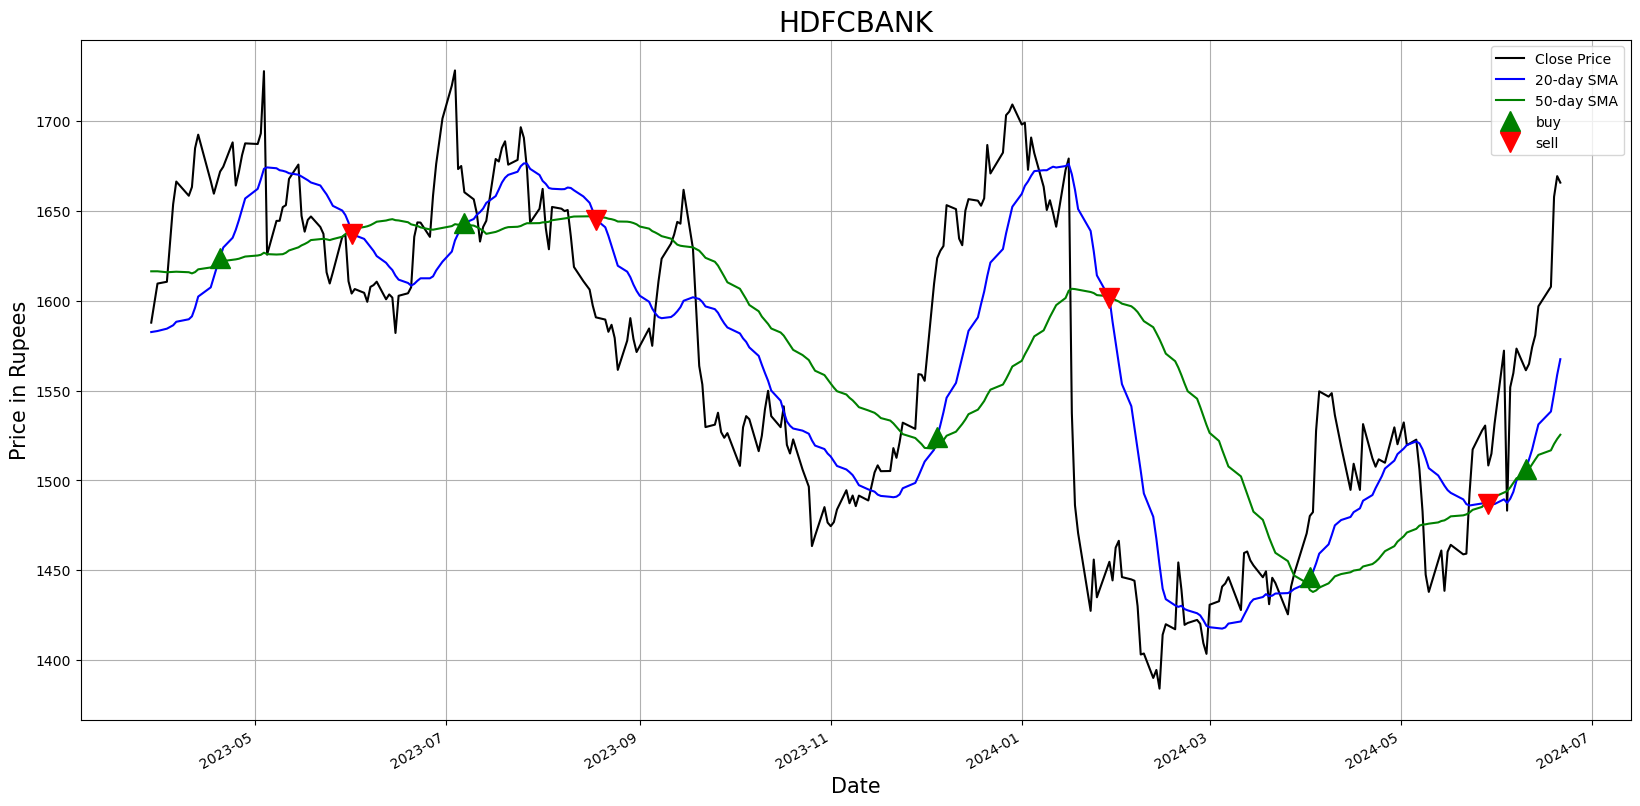

+---------------------+---------+------------+
| Date                |   Close | Position   |
|---------------------+---------+------------|
| 2023-04-20 00:00:00 | 1671.9  | Buy        |
| 2023-06-01 00:00:00 | 1604    | Sell       |
| 2023-07-07 00:00:00 | 1660.4  | Buy        |
| 2023-08-18 00:00:00 | 1590.75 | Sell       |
| 2023-12-05 00:00:00 | 1623.7  | Buy        |
| 2024-01-29 00:00:00 | 1454.65 | Sell       |
| 2024-04-02 00:00:00 | 1480.15 | Buy        |
| 2024-05-29 00:00:00 | 1508.3  | Sell       |
| 2024-06-10 00:00:00 | 1561.3  | Buy        |
+---------------------+---------+------------+


C:\Users\Avinash Warale\AppData\Local\Temp\ipykernel_11764\849130723.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pos = data.iloc[-data_point:][(data.iloc[-data_point:]['Position'] == 1) | (data['Position'] == -1)].copy()


In [24]:
GoldenCrossverSignal('HDFCBANK', 300)


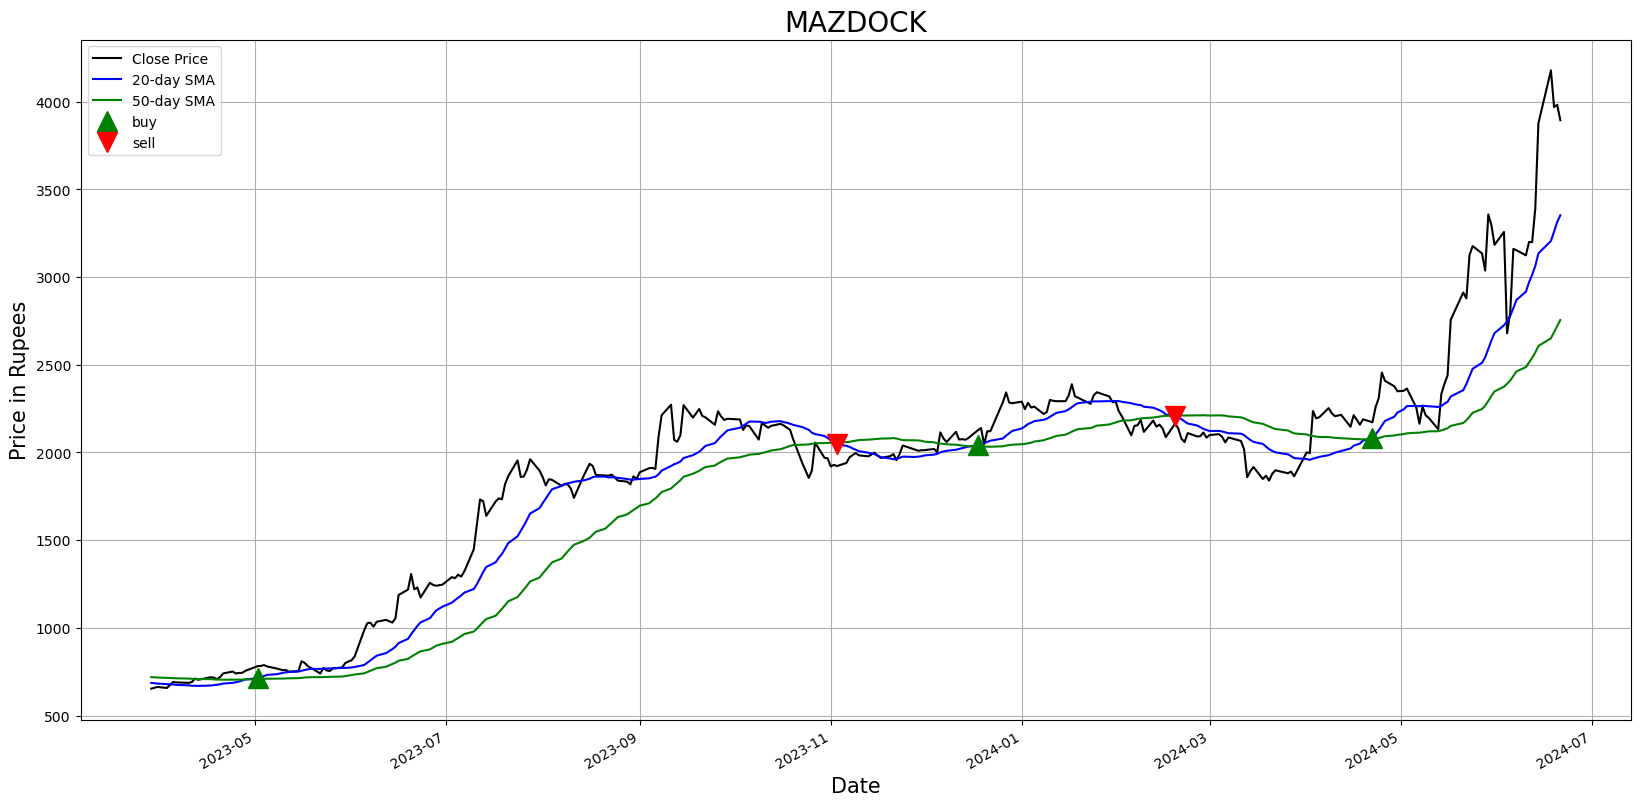

+---------------------+---------+------------+
| Date                |   Close | Position   |
|---------------------+---------+------------|
| 2023-05-02 00:00:00 |  781.9  | Buy        |
| 2023-11-03 00:00:00 | 1922.5  | Sell       |
| 2023-12-18 00:00:00 | 2126.8  | Buy        |
| 2024-02-19 00:00:00 | 2165.35 | Sell       |
| 2024-04-22 00:00:00 | 2172.1  | Buy        |
+---------------------+---------+------------+


C:\Users\Avinash Warale\AppData\Local\Temp\ipykernel_11764\849130723.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pos = data.iloc[-data_point:][(data.iloc[-data_point:]['Position'] == 1) | (data['Position'] == -1)].copy()


In [25]:
GoldenCrossverSignal('MAZDOCK', 300)
